In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup



In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
tesla = yf.Ticker("TSLA")

In [8]:
tesla_data = tesla.history(period="max")

In [9]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the Tesla revenue data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Initialize an empty list to store the data
data = []

# Extract data from each row in the table
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Append data to the list
    data.append({"Date": date, "Revenue": revenue})

# Create a DataFrame from the collected data
tesla_revenue = pd.DataFrame(data)

# Drop rows with missing values
tesla_revenue.dropna(inplace=True)

# Filter out rows with empty revenue
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last five rows
print(tesla_revenue.tail())



          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


In [28]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the GME revenue data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a GET request to the URL
html_data = requests.get(url).text

# Parse the HTML content of the page
soup = BeautifulSoup(html_data, 'html5lib')

# Initialize an empty list to store the data
data = []

# Extract data from each row in the table
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Append data to the list
    data.append({"Date": date, "Revenue": revenue})

# Create a DataFrame from the collected data
gme_revenue = pd.DataFrame(data)

# Display the last five rows
print(gme_revenue.tail())


          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


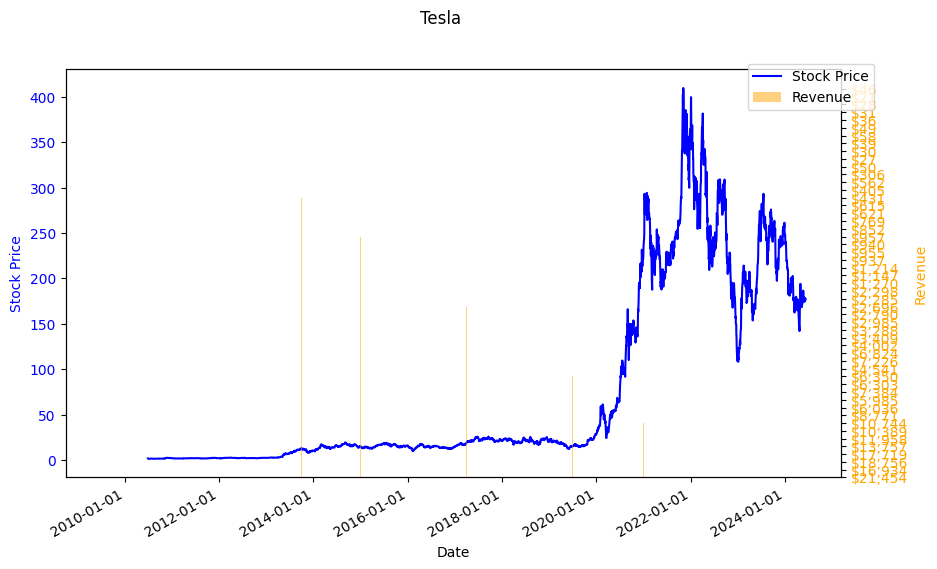

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def make_graph(stock_data, revenue_data, title):
    # Convert date strings to datetime objects
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    # Plot stock data
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create a second y-axis for revenue data
    ax2 = ax1.twinx()
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange', alpha=0.5)
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    
    # Format date axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    
    # Add legend and title
    fig.autofmt_xdate()
    fig.suptitle(title)
    fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.9))
    plt.show()

# Example usage:
make_graph(tesla_data, tesla_revenue, 'Tesla')


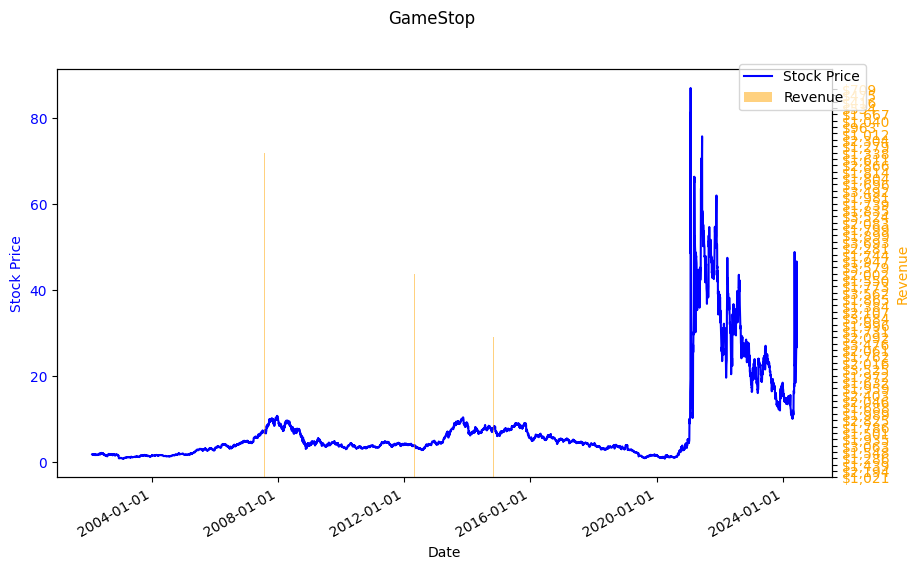

In [38]:
make_graph(gme_data, gme_revenue, 'GameStop')